## Part Zero: Data and Import Statements 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet , LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import r2_score,classification_report, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
Weed = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?raw=1")

weed_clean = Weed.dropna()

## Part One: Binary Classification

In [3]:
df_S_I = weed_clean[weed_clean["Type"].isin(["indica", "sativa"])]

XSI = df_S_I.drop(["Type", "Strain", "Effects", "Flavor"], axis = 1)
ySI = df_S_I["Type"]

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),],
  remainder = "passthrough"
)

### Q1: LDA

In [4]:
LDA_Pipe = Pipeline(
  [("preprocessing", ct),
  ("LDA", LinearDiscriminantAnalysis())]
)

param_grid_LDA = [
    {
        "LDA__solver": ["svd"],
        "LDA__n_components": [None, 1],
    },
]

grid_LDA = GridSearchCV(LDA_Pipe, param_grid_LDA, cv = 5, scoring = "accuracy")

test_LDA_fit = grid_LDA.fit(XSI, ySI)

In [5]:
test_LDA_fit.best_params_

{'LDA__n_components': None, 'LDA__solver': 'svd'}

In [6]:
LDA = pd.DataFrame(grid_LDA.cv_results_)[["params", "mean_test_score"]]
LDA

,params,mean_test_score
0,"{'LDA__n_components': None, 'LDA__solver': 'svd'}",0.859541
1,"{'LDA__n_components': 1, 'LDA__solver': 'svd'}",0.859541


In [7]:
LDA_final = Pipeline(
  [("preprocessing", ct),
  ("LDA", LinearDiscriminantAnalysis(n_components = None, 
                                    solver = "svd"))
                                    ]
)

In [8]:
Final_LDA_Fit = LDA_final.fit(XSI, ySI)

LDA_pred = Final_LDA_Fit.predict(XSI)

<function matplotlib.pyplot.show(close=None, block=None)>

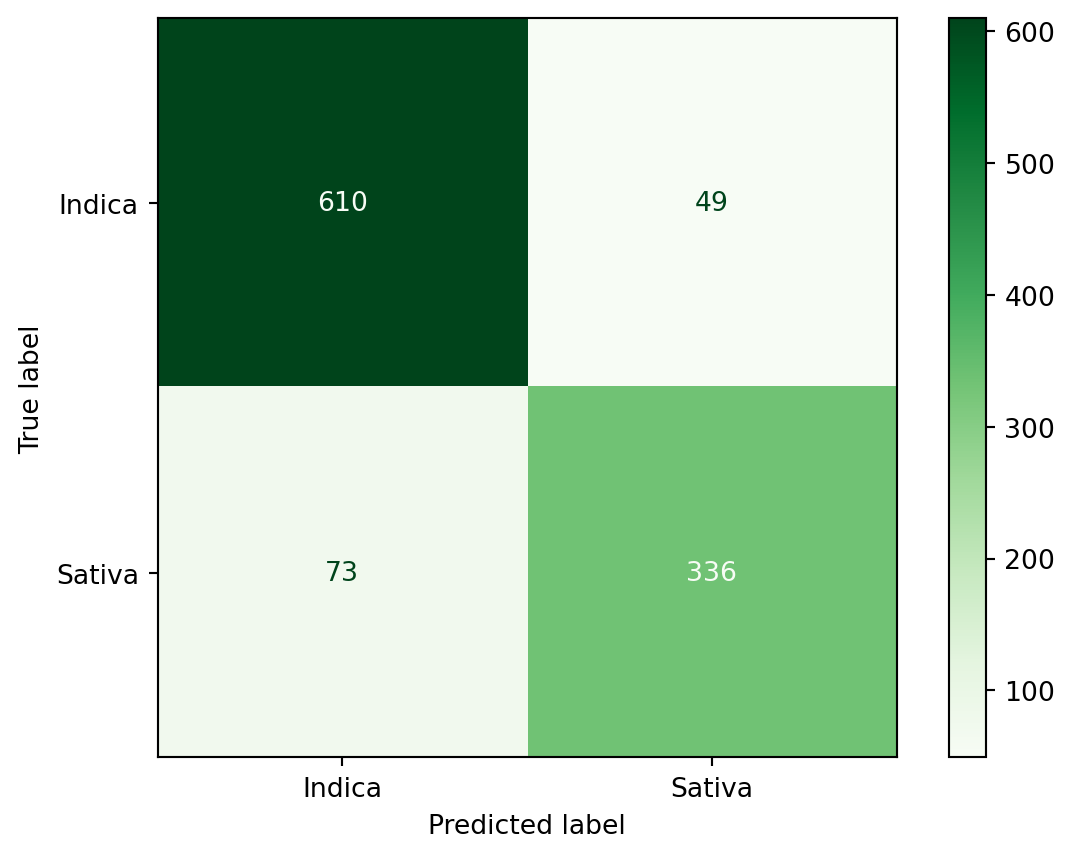

In [9]:
CM_plot_LDA = ConfusionMatrixDisplay(confusion_matrix(ySI, LDA_pred), 
                                    display_labels=["Indica", "Sativa"])
CM_plot_LDA.plot(cmap="Greens")
plt.show

### Q2: QDA

In [10]:
QDA_Pipe = Pipeline(
  [("preprocessing", ct),
  ("QDA", QuadraticDiscriminantAnalysis())]
)

param_grid_QDA = {
    "QDA__reg_param": [0.01, 0.1, 0.5, 0.9],
    "QDA__tol": [1e-4, 1e-3],
}

grid_QDA = GridSearchCV(QDA_Pipe, param_grid_QDA, cv = 5, scoring="accuracy")

test_QDA_fit = grid_QDA.fit(XSI, ySI)

In [11]:
test_QDA_fit.best_params_

{'QDA__reg_param': 0.1, 'QDA__tol': 0.0001}

In [12]:
QDA = pd.DataFrame(grid_QDA.cv_results_)[["params", "mean_test_score"]]
QDA

,params,mean_test_score
0,"{'QDA__reg_param': 0.01, 'QDA__tol': 0.0001}",0.820254
1,"{'QDA__reg_param': 0.01, 'QDA__tol': 0.001}",0.820254
2,"{'QDA__reg_param': 0.1, 'QDA__tol': 0.0001}",0.866123
3,"{'QDA__reg_param': 0.1, 'QDA__tol': 0.001}",0.866123
4,"{'QDA__reg_param': 0.5, 'QDA__tol': 0.0001}",0.852069
5,"{'QDA__reg_param': 0.5, 'QDA__tol': 0.001}",0.852069
6,"{'QDA__reg_param': 0.9, 'QDA__tol': 0.0001}",0.841766
7,"{'QDA__reg_param': 0.9, 'QDA__tol': 0.001}",0.841766


In [13]:
QDA_final = Pipeline(
  [("preprocessing", ct),
  ("QDA", QuadraticDiscriminantAnalysis(reg_param = 0.01,
                                        tol = 0.0001))]
)

In [14]:
Final_QDA_Fit = QDA_final.fit(XSI, ySI)

QDA_pred = Final_QDA_Fit.predict(XSI)

In [15]:
print(classification_report(ySI, QDA_pred))

              precision    recall  f1-score   support

      indica       0.92      0.90      0.91       659
      sativa       0.84      0.88      0.86       409

    accuracy                           0.89      1068
   macro avg       0.88      0.89      0.89      1068
weighted avg       0.89      0.89      0.89      1068



<function matplotlib.pyplot.show(close=None, block=None)>

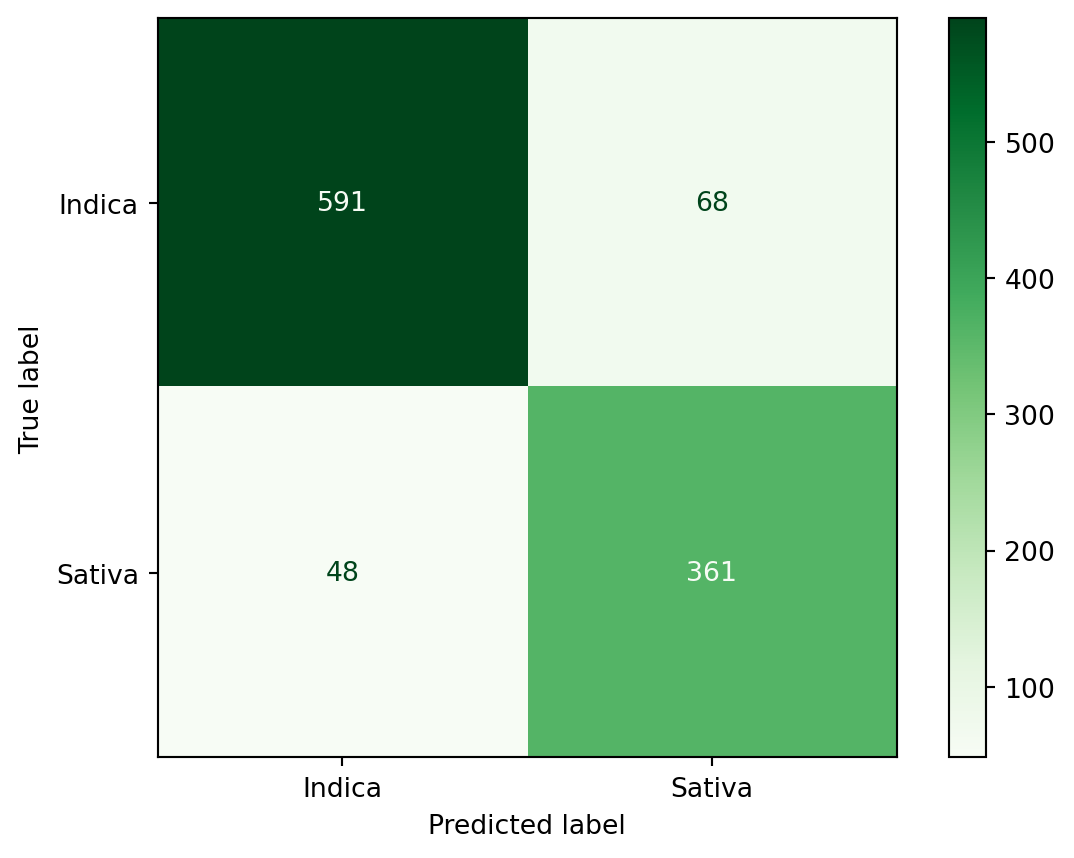

In [16]:
CM_plot_QDA = ConfusionMatrixDisplay(confusion_matrix(ySI, QDA_pred), 
                                    display_labels=["Indica", "Sativa"])
CM_plot_QDA.plot(cmap="Greens")
plt.show

### Q3: SVC

In [17]:
SVC_pipe = Pipeline(
    [("preprocessing", ct),
    ("SVC", SVC())]
)

param_grid_svc = {
        "SVC__kernel": ["linear"],
        "SVC__C": [0.1, 1, 10, 100]}


grid_SVC = GridSearchCV(SVC_pipe, param_grid_svc, cv = 5, scoring="accuracy")

test_SVC_fit = grid_SVC.fit(XSI, ySI)

In [18]:
test_SVC_fit.best_params_

{'SVC__C': 0.1, 'SVC__kernel': 'linear'}

In [19]:
SVC_Results = pd.DataFrame(grid_SVC.cv_results_)[["params", "mean_test_score"]]
SVC_Results

,params,mean_test_score
0,"{'SVC__C': 0.1, 'SVC__kernel': 'linear'}",0.866109
1,"{'SVC__C': 1, 'SVC__kernel': 'linear'}",0.853003
2,"{'SVC__C': 10, 'SVC__kernel': 'linear'}",0.856746
3,"{'SVC__C': 100, 'SVC__kernel': 'linear'}",0.855812


In [20]:
SVC_Final = Pipeline(
    [("preprocessing", ct),
    ("SVC", SVC(C = 0.1, kernel = "linear"))]
)

In [21]:
Final_SVC_Fit = SVC_Final.fit(XSI, ySI)

SVC_pred = Final_SVC_Fit.predict(XSI)

<function matplotlib.pyplot.show(close=None, block=None)>

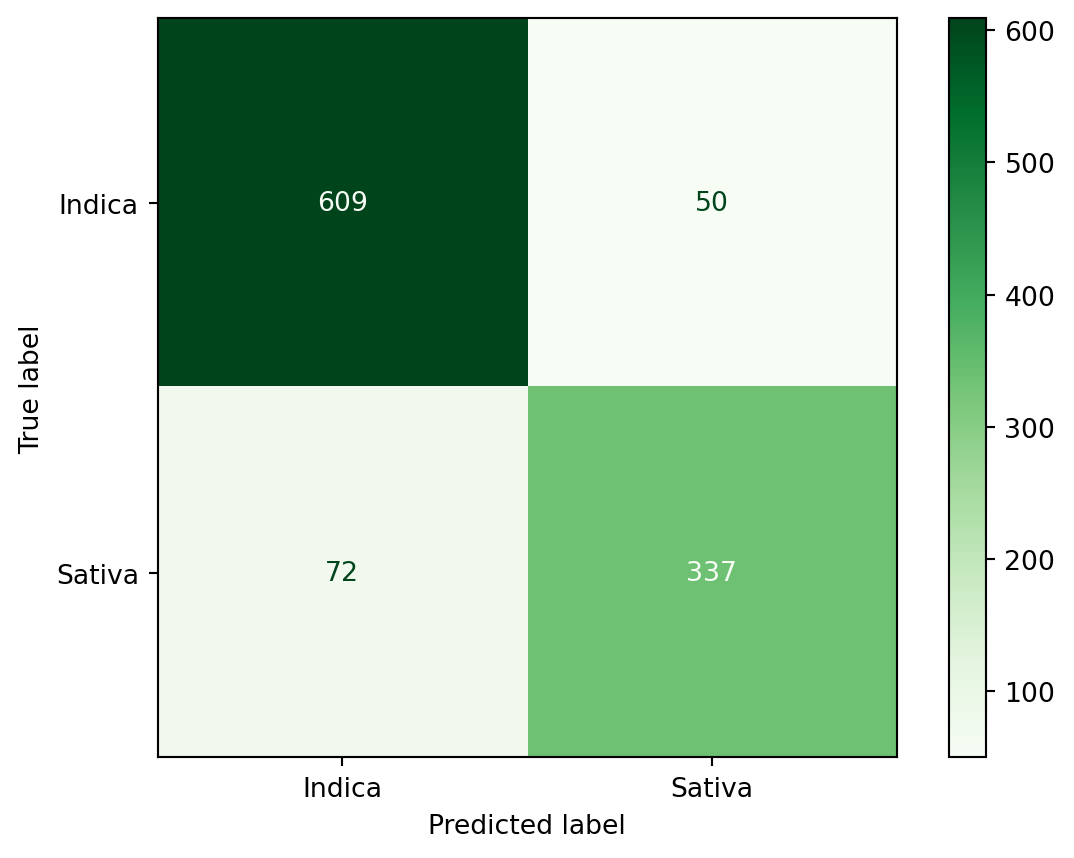

In [22]:
CM_plot_SVC = ConfusionMatrixDisplay(confusion_matrix(ySI, SVC_pred), 
                                    display_labels=["Indica", "Sativa"])
CM_plot_SVC.plot(cmap="Greens")
plt.show

### Q4: SVM

In [23]:
SVM_Pipe = Pipeline(
  [("preprocessing", ct),
  ("SVM", SVC()  )]
)

param_grid_SVM = {
        "SVM__kernel": ["rbf"],
        "SVM__C": [0.1, 1, 10, 100]}

grid_SVM = GridSearchCV(SVM_Pipe, param_grid_SVM, cv = 5, scoring="accuracy")

test_SVM_fit = grid_SVM.fit(XSI, ySI)

In [24]:
test_SVM_fit.best_params_

{'SVM__C': 1, 'SVM__kernel': 'rbf'}

In [25]:
SVM_Results = pd.DataFrame(grid_SVM.cv_results_)[["params", "mean_test_score"]]
SVM_Results

,params,mean_test_score
0,"{'SVM__C': 0.1, 'SVM__kernel': 'rbf'}",0.851134
1,"{'SVM__C': 1, 'SVM__kernel': 'rbf'}",0.863306
2,"{'SVM__C': 10, 'SVM__kernel': 'rbf'}",0.860502
3,"{'SVM__C': 100, 'SVM__kernel': 'rbf'}",0.854881


In [26]:
SVM_Final = Pipeline(
    [("preprocessing", ct),
    ("SVM", SVC(C = 1, kernel = "rbf"))]
)

In [27]:
Final_SVM_Fit = SVM_Final.fit(XSI, ySI)

SVM_pred = Final_SVM_Fit.predict(XSI)

<function matplotlib.pyplot.show(close=None, block=None)>

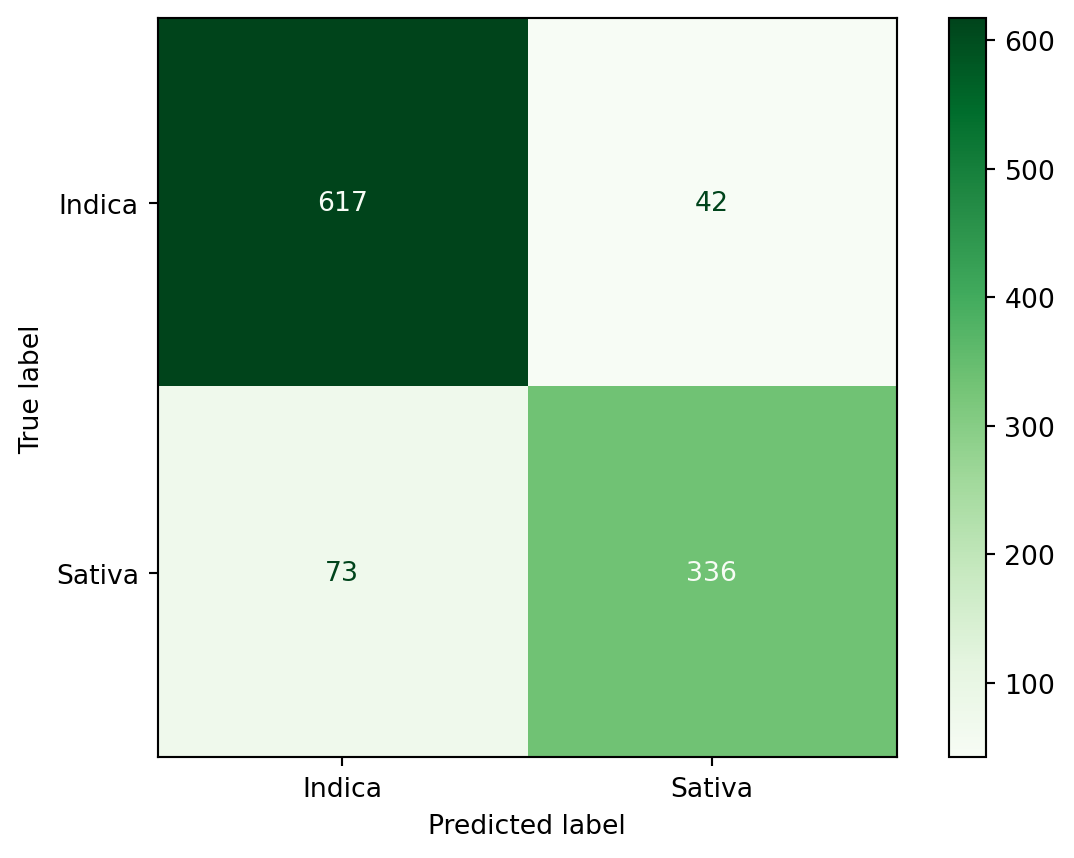

In [28]:
CM_plot_SVM = ConfusionMatrixDisplay(confusion_matrix(ySI, SVM_pred), 
                                    display_labels=["Indica", "Sativa"])
CM_plot_SVM.plot(cmap="Greens")
plt.show

### Comparison

In [29]:
LDA_tbl = LDA[["params", "mean_test_score"]].copy()
LDA_tbl["model"] = "LDA"

QDA_tbl = QDA[["params", "mean_test_score"]].copy()
QDA_tbl["model"] = "QDA"

SVC_tbl = SVC_Results[["params", "mean_test_score"]].copy()
SVC_tbl["model"] = "SVC"

SVM_tbl = SVM_Results[["params", "mean_test_score"]].copy()
SVM_tbl["model"] = "SVM"

In [30]:
p1_models = pd.concat([LDA_tbl, QDA_tbl, SVC_tbl, SVM_tbl],
                      ignore_index=True)
p1_models

,params,mean_test_score,model
0,"{'LDA__n_components': None, 'LDA__solver': 'svd'}",0.859541,LDA
1,"{'LDA__n_components': 1, 'LDA__solver': 'svd'}",0.859541,LDA
2,"{'QDA__reg_param': 0.01, 'QDA__tol': 0.0001}",0.820254,QDA
3,"{'QDA__reg_param': 0.01, 'QDA__tol': 0.001}",0.820254,QDA
4,"{'QDA__reg_param': 0.1, 'QDA__tol': 0.0001}",0.866123,QDA
5,"{'QDA__reg_param': 0.1, 'QDA__tol': 0.001}",0.866123,QDA
6,"{'QDA__reg_param': 0.5, 'QDA__tol': 0.0001}",0.852069,QDA
7,"{'QDA__reg_param': 0.5, 'QDA__tol': 0.001}",0.852069,QDA
8,"{'QDA__reg_param': 0.9, 'QDA__tol': 0.0001}",0.841766,QDA
9,"{'QDA__reg_param': 0.9, 'QDA__tol': 0.001}",0.841766,QDA


In [31]:
p1_models.loc[p1_models["mean_test_score"].idxmax()]

params             {'QDA__reg_param': 0.1, 'QDA__tol': 0.0001}
mean_test_score                                       0.866123
model                                                      QDA
Name: 4, dtype: object

For the binary classification models it appears that the QDA perfromed the best in terms of accuracy in showing the type of cannibis based on our predictor variables with the highest mean test score of 0.866123, with SVC coming in close behind with .866109, showing just how well all of the model performed when prediction type. 

## Part Two: Natural Multiclass

In [32]:
X_all = weed_clean.drop(["Type", "Strain", "Effects", "Flavor"], axis = 1)
y_all = weed_clean["Type"]

### Q1

In [33]:
Tree_pipe = Pipeline(
  [("preprocessing", ct),
  ("Tree", DecisionTreeClassifier())]
)

param_grid_Tree = {
    "Tree__max_depth": [None, 3, 5, 8, 12],
    "Tree__min_samples_split": [2, 5, 10, 20],
    "Tree__min_samples_leaf": [1, 2, 5, 10],
    "Tree__splitter": ["best", "random"],
    "Tree__ccp_alpha": [0.0, 0.0005, 0.001, 0.005]  
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [34]:
tree_gs = GridSearchCV(Tree_pipe, param_grid_Tree, cv=cv, scoring = "accuracy", n_jobs = -1)

test_tree = tree_gs.fit(X_all, y_all)
test_tree.best_params_

{'Tree__ccp_alpha': 0.0,
 'Tree__max_depth': 3,
 'Tree__min_samples_leaf': 10,
 'Tree__min_samples_split': 2,
 'Tree__splitter': 'random'}

In [35]:
Tree_Results = pd.DataFrame(test_tree.cv_results_)[["params", "mean_test_score"]]

In [36]:
Tree_Final = Pipeline(
  [("preprocessing", ct),
  ("Tree", DecisionTreeClassifier(ccp_alpha = 0.0, max_depth=3, min_samples_leaf=10,
                                    min_samples_split=2, splitter="random"))]
)

In [37]:
Tree_Final_Fit = Tree_Final.fit(X_all, y_all)

Tree_pred = Tree_Final_Fit.predict(X_all)
Tree_Final_Fit.classes_

array(['hybrid', 'indica', 'sativa'], dtype=object)

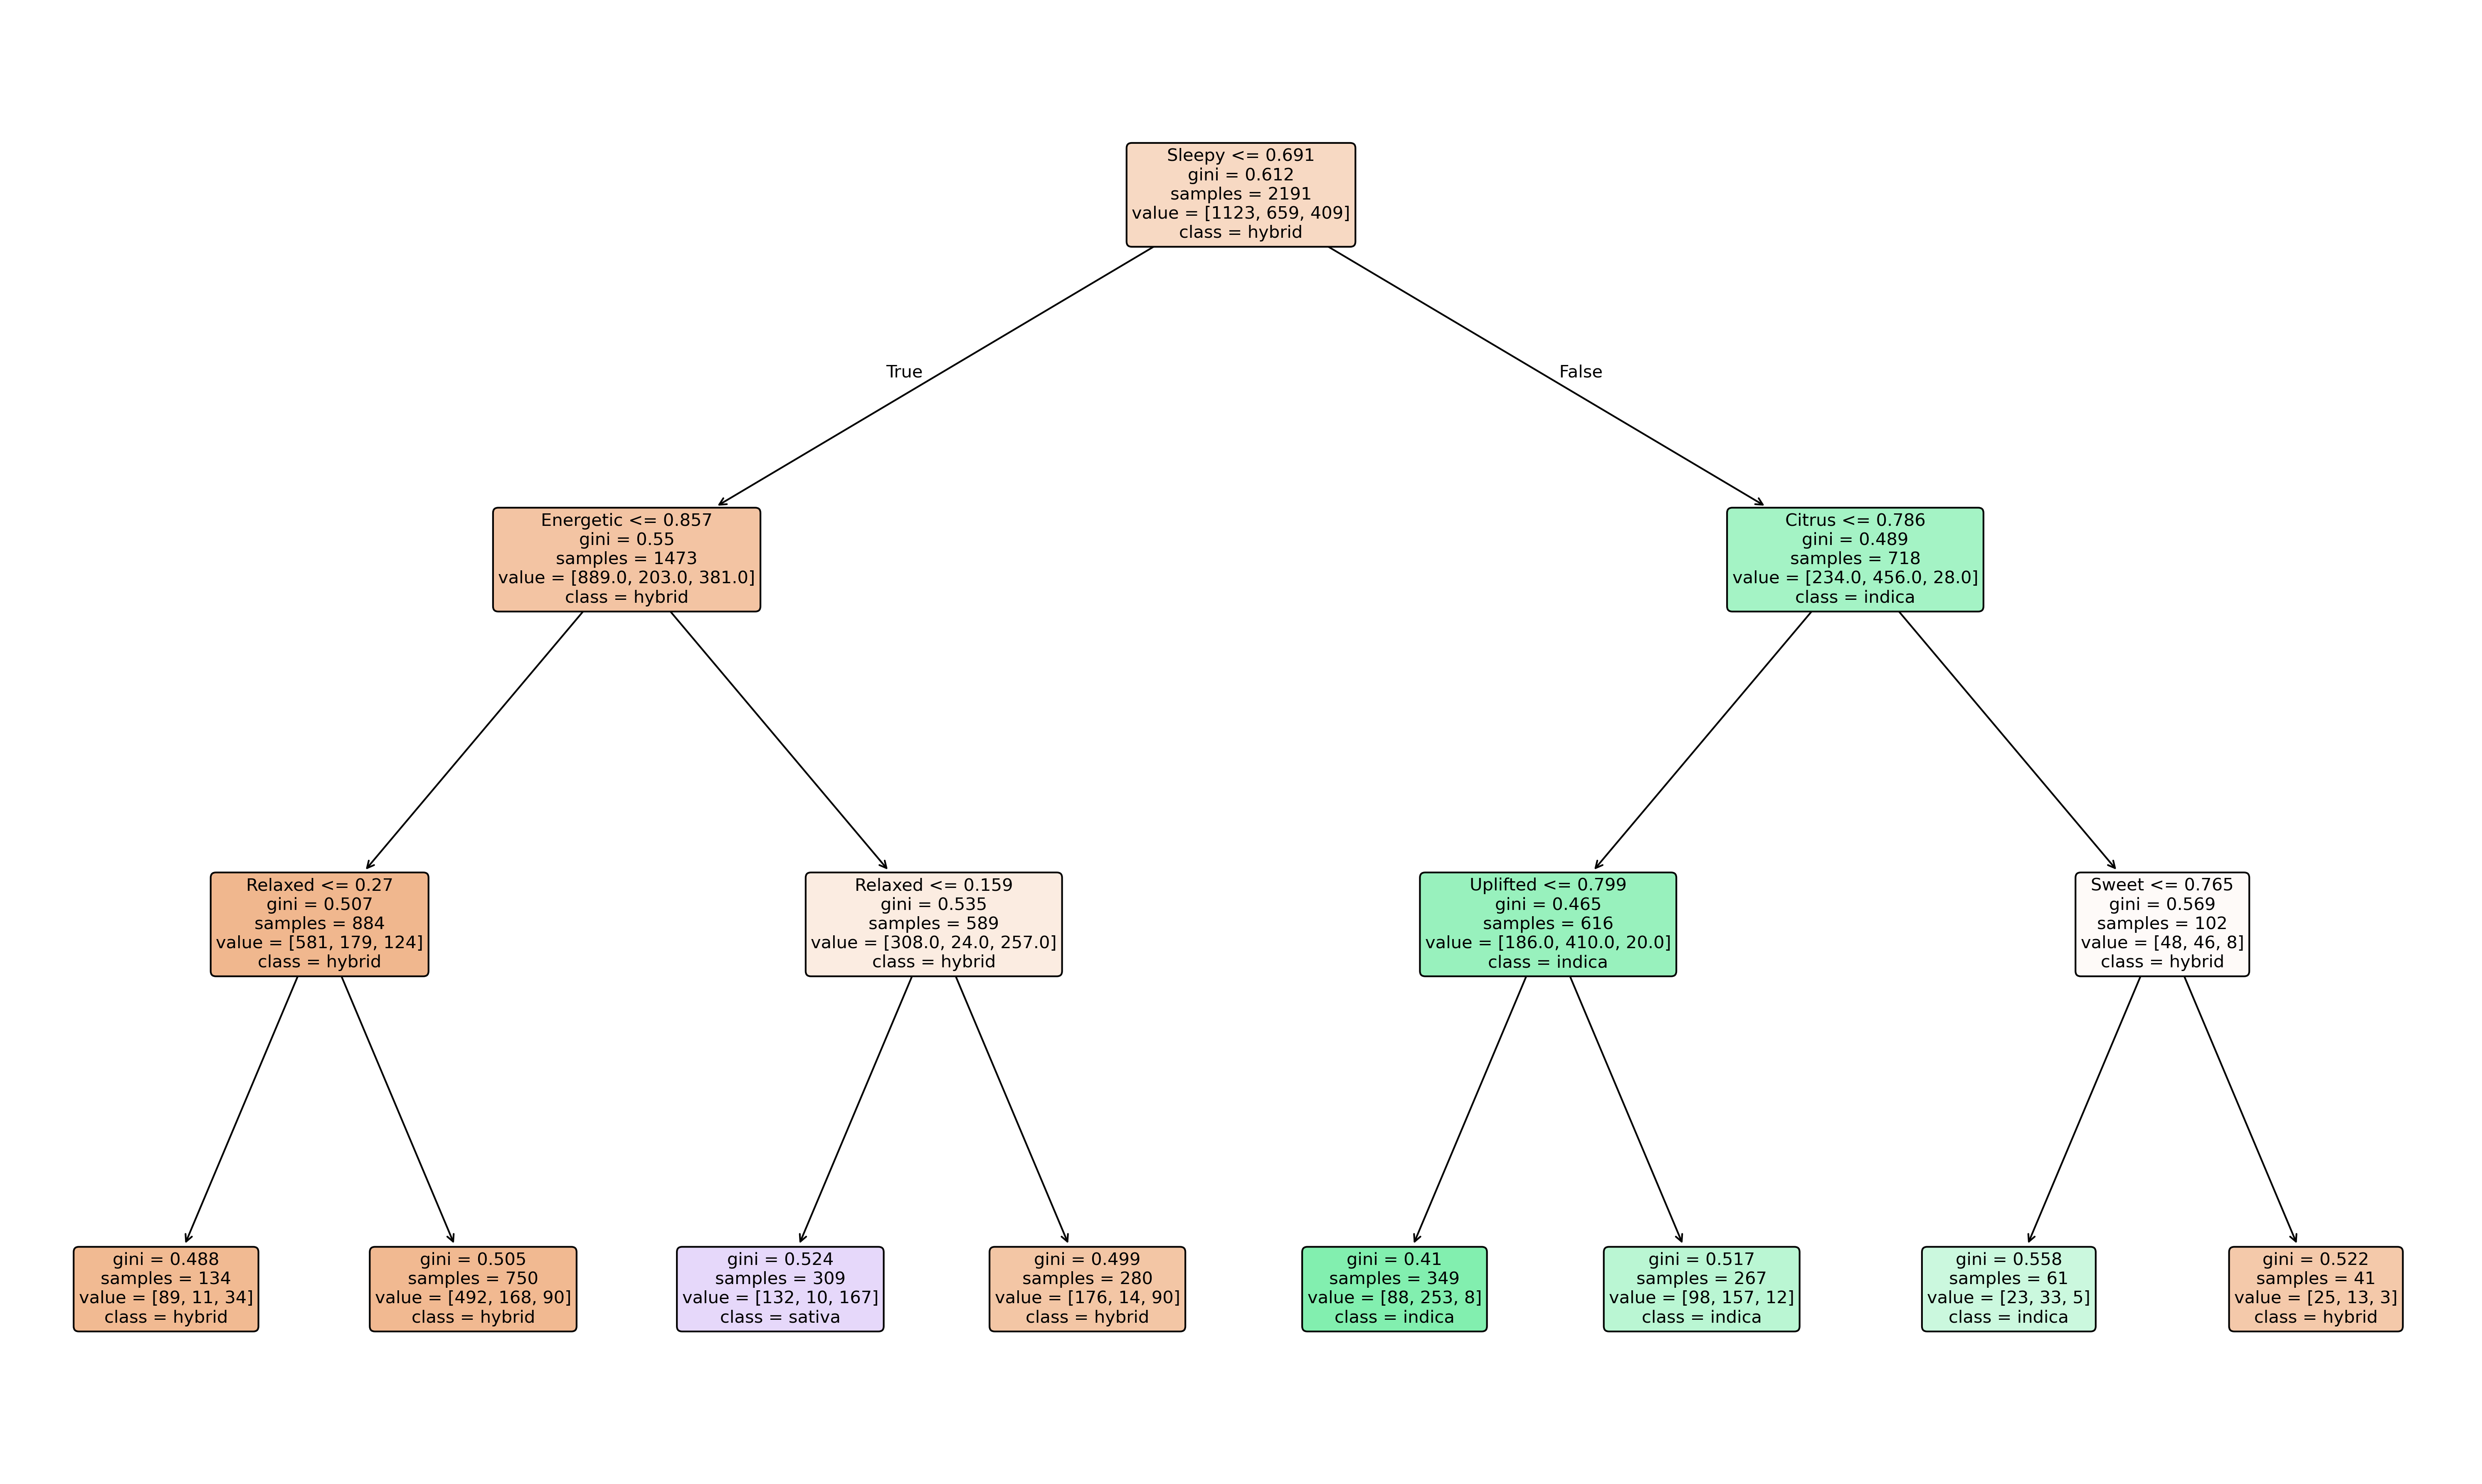

In [38]:
plt.figure(figsize=(20, 12), dpi=150)  
plot_tree(
    Tree_Final_Fit.named_steps["Tree"],              
    feature_names=Tree_Final_Fit.feature_names_in_,
    class_names= Tree_Final_Fit.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.tight_layout()
plt.show()

Interperting our tree shows that the root split is by the feature sleepy and splits up the classes with left being miostly hypbrid and some sativa and the rihht being indica versus hybrid. Sleepy is the most significant in determining the type for this dataset.

### Q2

In [39]:
def Build_and_Test_Pipeline (pipeline_name, params,
                             model_name, model_sklearn, X, y):

    pipeline_name = Pipeline(
       [("preprocessing", ct),
        (model_name, model_sklearn)]
    )   

    grid = GridSearchCV(pipeline_name, params, cv = 5, scoring = "accuracy")
    fit = grid.fit(X, y)
    print(pd.DataFrame(fit.cv_results_)[["params", "mean_test_score"]])
    return (fit.best_params_)


def Final_Pipeline_and_Plot(pipeline_name, model_name, model_sklearn, X,y):

    pipeline_name = Pipeline(
        [("preprocessing", ct),
        (model_name, model_sklearn)]
    )

    fit = pipeline_name.fit(X,y)
    pred = fit.predict(X)

    CM_plot = ConfusionMatrixDisplay(confusion_matrix(y, pred), 
                                    display_labels=["Hybrid","Indica", "Sativa"])
    CM_plot.plot(cmap="Greens")
    return(plt.show)

### LDA

In [40]:
Build_and_Test_Pipeline("LDA2_pipe", param_grid_LDA, "LDA", LinearDiscriminantAnalysis(), X_all, y_all)

                                              params  mean_test_score
0  {'LDA__n_components': None, 'LDA__solver': 'svd'}         0.628024
1     {'LDA__n_components': 1, 'LDA__solver': 'svd'}         0.628024


{'LDA__n_components': None, 'LDA__solver': 'svd'}

<function matplotlib.pyplot.show(close=None, block=None)>

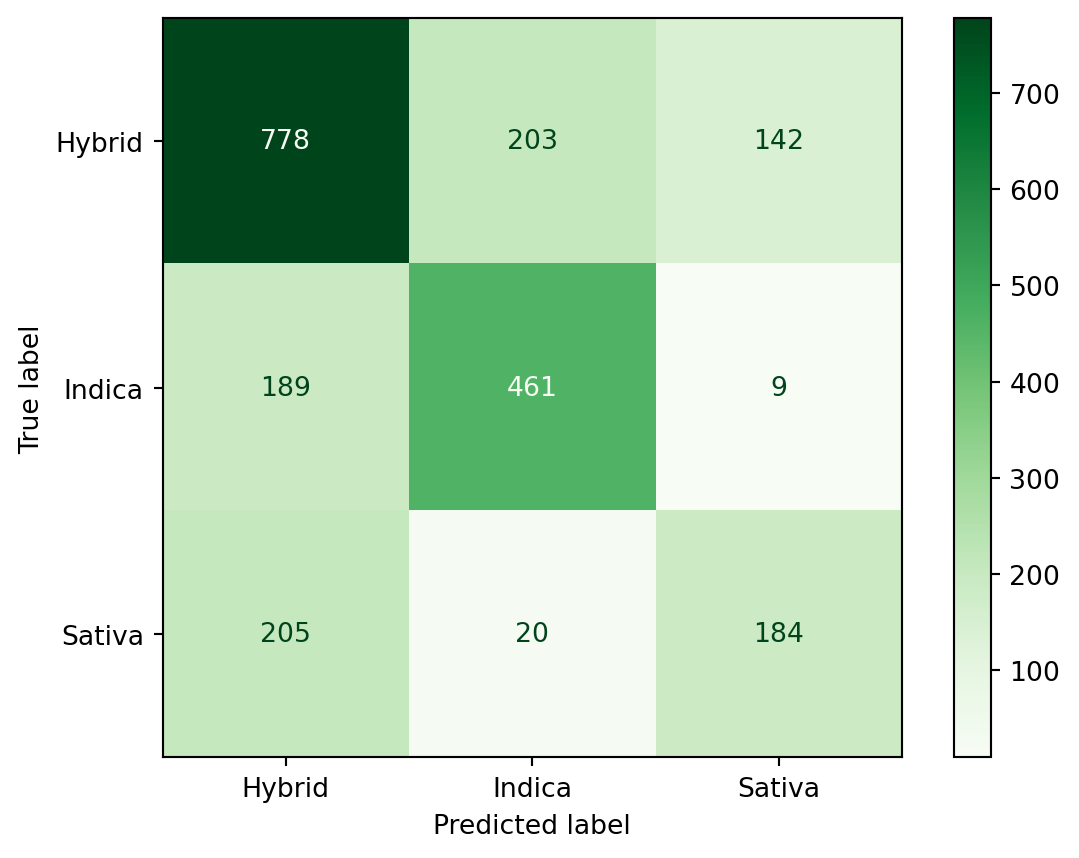

In [41]:
Final_Pipeline_and_Plot("Final_LDA2", "LDA", LinearDiscriminantAnalysis(
n_components= None, solver= "svd"), X_all, y_all
)

### QDA 

In [42]:
Build_and_Test_Pipeline("QDA2_pipe", param_grid_QDA, "QDA", QuadraticDiscriminantAnalysis(), X_all, y_all)

                                         params  mean_test_score
0  {'QDA__reg_param': 0.01, 'QDA__tol': 0.0001}         0.518040
1   {'QDA__reg_param': 0.01, 'QDA__tol': 0.001}         0.518040
2   {'QDA__reg_param': 0.1, 'QDA__tol': 0.0001}         0.591520
3    {'QDA__reg_param': 0.1, 'QDA__tol': 0.001}         0.591520
4   {'QDA__reg_param': 0.5, 'QDA__tol': 0.0001}         0.619357
5    {'QDA__reg_param': 0.5, 'QDA__tol': 0.001}         0.619357
6   {'QDA__reg_param': 0.9, 'QDA__tol': 0.0001}         0.568680
7    {'QDA__reg_param': 0.9, 'QDA__tol': 0.001}         0.568680


{'QDA__reg_param': 0.5, 'QDA__tol': 0.0001}

<function matplotlib.pyplot.show(close=None, block=None)>

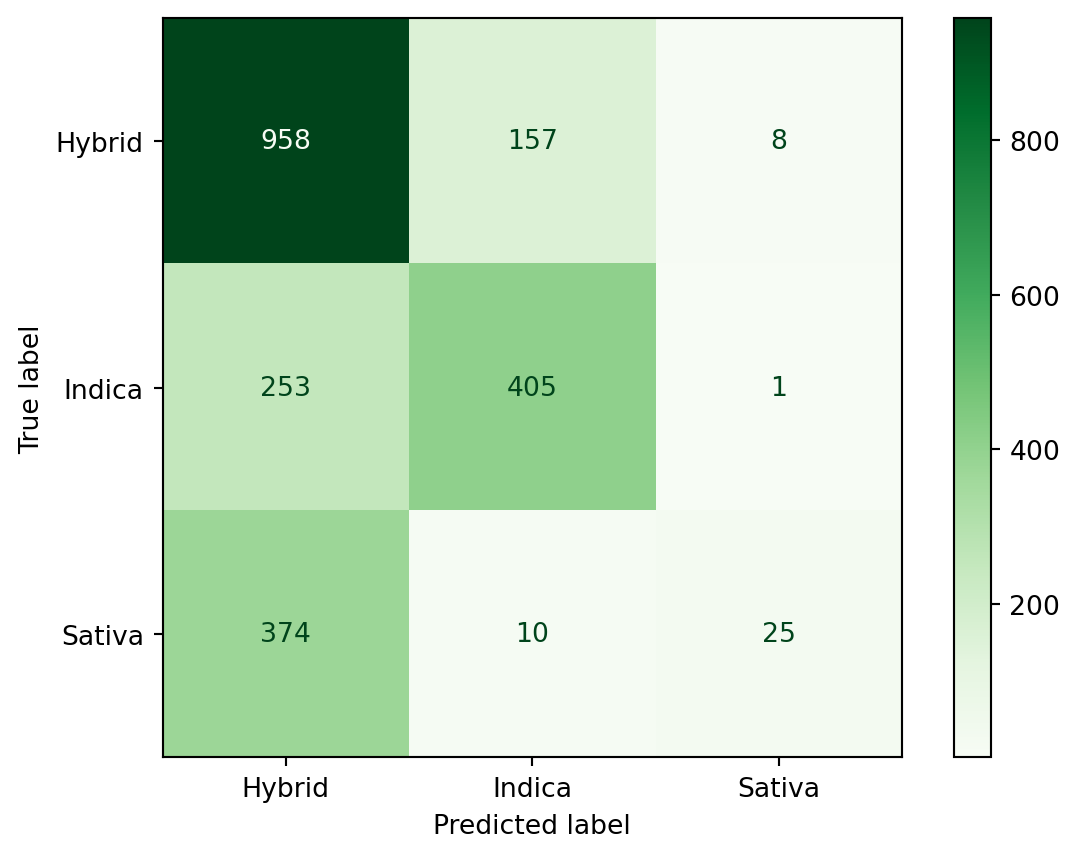

In [43]:
Final_Pipeline_and_Plot("Final_QDA2", "QDA", QuadraticDiscriminantAnalysis(
    reg_param= 0.5, tol = 0.0001
), X_all, y_all)

### KNN

In [44]:
param_grid_knn = {
    "KNN__n_neighbors": range(1,100)}

In [45]:
Build_and_Test_Pipeline("KNN_pipe", param_grid_knn, "KNN", KNeighborsClassifier(), X_all, y_all)

                      params  mean_test_score
0    {'KNN__n_neighbors': 1}         0.520311
1    {'KNN__n_neighbors': 2}         0.545874
2    {'KNN__n_neighbors': 3}         0.562303
3    {'KNN__n_neighbors': 4}         0.557739
4    {'KNN__n_neighbors': 5}         0.578727
..                       ...              ...
94  {'KNN__n_neighbors': 95}         0.609769
95  {'KNN__n_neighbors': 96}         0.610680
96  {'KNN__n_neighbors': 97}         0.612049
97  {'KNN__n_neighbors': 98}         0.608855
98  {'KNN__n_neighbors': 99}         0.612050

[99 rows x 2 columns]


{'KNN__n_neighbors': 39}

<function matplotlib.pyplot.show(close=None, block=None)>

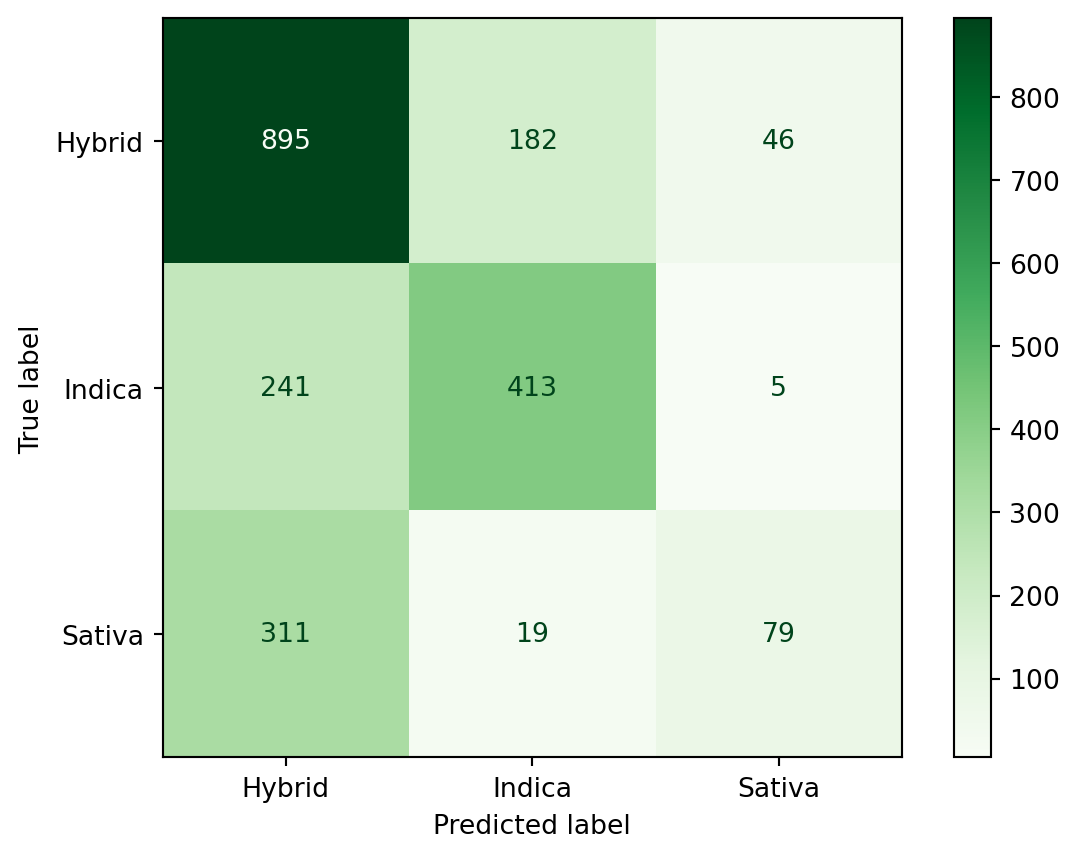

In [46]:
Final_Pipeline_and_Plot("Finall_KNN", "KNN", KNeighborsClassifier(n_neighbors=39), X_all, y_all)

### Q3

The metrics performed worse than in part one which likely has to do with adding another variable to try and predict is a lot harder on the model versus only 2 varaibles needed to predict for. The sativa category was the most mistaked and this is most likely due to fewer overall rows in the dataset for sativa making it harder to predict for leading to confusion throughout the models. 

## Part Three: Multiclass from Binary

In [47]:
weed_clean["Type_S"] = np.where(weed_clean["Type"] == "sativa", 1, 0)
weed_clean["Type_I"] = np.where(weed_clean["Type"] == "indica", 1, 0)
weed_clean["Type_H"] = np.where(weed_clean["Type"] == "hybrid", 1, 0)

C:\Users\ldcal\AppData\Local\Temp\ipykernel_11052\1885231572.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ldcal\AppData\Local\Temp\ipykernel_11052\1885231572.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ldcal\AppData\Local\Temp\ipykernel_11052\1885231572.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

### Q1: OVR Modeling 

In [48]:
pipeOvr_Log = Pipeline(
  [("preprocessing", ct),
  ("ovr",OneVsRestClassifier(LogisticRegression(max_iter=5000)))]
  )

pipeOvr_SVC = Pipeline(
  [("preprocessing", ct),
  ("ovr",OneVsRestClassifier(SVC(C = 1, kernel = "rbf")))]
  )

In [49]:
X_2 = weed_clean.drop(["Type", "Type_S", "Type_I", "Type_H"], axis = 1)

comp = []

#### Indica

In [50]:
y_i = weed_clean["Type_I"]

In [51]:
score_LR1 = cross_val_score(
        estimator=pipeOvr_Log,
        X=X_2,
        y=y_i,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "Log_Reg", "Type" : "indica", "F1_mean": score_LR1.mean(),
 "F1_std": score_LR1.std()})

In [52]:
score_SVC1 = cross_val_score(
        estimator=pipeOvr_SVC,
        X=X_2,
        y=y_i,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "SVC", "Type" : "indica", "F1_mean": score_SVC1.mean(),
 "F1_std": score_SVC1.std()})

#### Sativa

In [53]:
y_s = weed_clean["Type_S"]

In [54]:
score_LR2 = cross_val_score(
        estimator=pipeOvr_Log,
        X=X_2,
        y=y_s,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "Log_Reg", "Type" : "sativa", "F1_mean": score_LR2.mean(),
 "F1_std": score_LR2.std()})

In [55]:
score_SVC2 = cross_val_score(
        estimator=pipeOvr_SVC,
        X=X_2,
        y=y_s,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "SVC", "Type" : "sativa", "F1_mean": score_SVC2.mean(),
 "F1_std": score_SVC2.std()})

#### Hybrid

In [56]:
y_h = weed_clean["Type_H"]

In [57]:
score_LR3 = cross_val_score(
        estimator=pipeOvr_Log,
        X=X_2,
        y=y_h,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "Log_Reg", "Type" : "hybrid", "F1_mean": score_LR3.mean(),
 "F1_std": score_LR3.std()})

In [58]:
score_SVC3 = cross_val_score(
        estimator=pipeOvr_SVC,
        X=X_2,
        y=y_h,
        cv=cv,
        scoring="f1_macro",
        n_jobs=-1
    )


comp.append({"model" : "SVC", "Type" : "hybrid", "F1_mean": score_SVC3.mean(),
 "F1_std": score_SVC3.std()})

### Q2

In [59]:
ovr_data = pd.DataFrame(comp)
ovr_data

,model,Type,F1_mean,F1_std
0,Log_Reg,indica,0.747819,0.022377
1,SVC,indica,0.753298,0.028884
2,Log_Reg,sativa,0.649856,0.023388
3,SVC,sativa,0.448384,0.008865
4,Log_Reg,hybrid,0.620473,0.017918
5,SVC,hybrid,0.612020,0.022336


The model that performed the best was the indica svc model and the ine that performed the worst was the sativa svc model. this makes sense as their was a good amout of data to provide for indica versus sativa did not have as much data, making it easier to disinguish. Hybrid is also a mix between indica and sativa which makes it harder to tell apart so it makes sense to have indica and sativa at opposite ends of the spectrum. 

### Q3

In [60]:
OvO_coll = []

In [61]:
# Use SVC Final Pipeline

log_reg = Pipeline(
    [("preprocessing", ct),
  ("log", LogisticRegression(max_iter=5000))]
  )

#### Indica vs. Sativa

In [62]:
i_vs_s = weed_clean[(weed_clean["Type"] == "indica") | (weed_clean["Type"] == "sativa")]

X_I_S = i_vs_s.drop(["Type", "Strain", "Effects", "Flavor", "Type_S", "Type_H", "Type_I"], axis = 1)
y_I_S = i_vs_s["Type"]

In [63]:
fit_log_I_S = log_reg.fit(X_I_S, y_I_S)

fit_SVC_I_S = SVC_Final.fit(X_I_S, y_I_S)

In [64]:
#Logistic Regression

s1 = cross_val_score(fit_log_I_S, X_I_S, y_I_S, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "Log_Reg", "Type" : "I_vs_S", "roc_mean": s1.mean(),
 "roc_std": s1.std()})

In [65]:
#SVC

s2 = cross_val_score(fit_SVC_I_S, X_I_S, y_I_S, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "SVC", "Type" : "I_vs_S", "roc_mean": s2.mean(),
 "roc_std": s2.std()})

#### Indica vs. Hybrid

In [66]:
i_vs_h = weed_clean[(weed_clean["Type"] == "indica") | (weed_clean["Type"] == "hybrid")]

X_I_H = i_vs_h.drop(["Type", "Strain", "Effects", "Flavor", "Type_S", "Type_H", "Type_I"], axis = 1)
y_I_H = i_vs_h["Type"]

In [67]:
fit_log_I_H = log_reg.fit(X_I_H, y_I_H)

fit_SVC_I_H = SVC_Final.fit(X_I_H, y_I_H)

In [68]:
#Logistic Regression

s3 = cross_val_score(fit_log_I_H, X_I_H, y_I_H, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "Log_Reg", "Type" : "I_vs_H", "roc_mean": s3.mean(),
 "roc_std": s3.std()})

In [69]:
#SVC

s4 = cross_val_score(fit_SVC_I_H, X_I_H, y_I_H, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "SVC", "Type" : "I_vs_H", "roc_mean": s4.mean(),
 "roc_std": s4.std()})

#### Hybrid vs. Sativa

In [70]:
h_vs_s = weed_clean[(weed_clean["Type"] == "hybrid") | (weed_clean["Type"] == "sativa")]

X_H_S= h_vs_s.drop(["Type", "Strain", "Effects", "Flavor", "Type_S", "Type_H", "Type_I"], axis = 1)
y_H_S = h_vs_s["Type"]

In [71]:
fit_log_H_S = log_reg.fit(X_H_S, y_H_S)

fit_SVC_H_S = SVC_Final.fit(X_H_S, y_H_S)

In [72]:
#Logistic Regression

s5 = cross_val_score(fit_log_H_S, X_H_S, y_H_S, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "Log_Reg", "Type" : "H_vs_S", "roc_mean": s5.mean(),
 "roc_std": s5.std()})

In [73]:
#SVC

s6 = cross_val_score(fit_SVC_H_S, X_H_S, y_H_S, cv = cv, scoring= "roc_auc")

OvO_coll.append({"model" : "SVC", "Type" : "H_vs_S", "roc_mean": s6.mean(),
 "roc_std": s6.std()})

### Q4

In [74]:
OvO_data = pd.DataFrame(OvO_coll)
OvO_data

,model,Type,roc_mean,roc_std
0,Log_Reg,I_vs_S,0.937873,0.004381
1,SVC,I_vs_S,0.940225,0.005011
2,Log_Reg,I_vs_H,0.811666,0.018092
3,SVC,I_vs_H,0.799534,0.021095
4,Log_Reg,H_vs_S,0.743721,0.025170
5,SVC,H_vs_S,0.738959,0.023355


The Model that perfromed the best was the SVC model for indica versus sativa, and the one that perfromed the worst was the SVC for Hybrid Versus sativa. This makes sense as it aligns with the previous models earlier in this part which demostrated how it is eaier to make a distinction between indica and sativa and is hard to differentiate beween hybrid and the strains. Goin on what we know about cannabis these results align as they show that hybrid tends to mix elements of sativa or hybrid in the strain making it less unique than the pure forms of sativa or indica. 

### Q5

After reading sklearns documentation if we were to test the whole dataset using logistic regression and not specify, the model would perform ovo as the auto function looks through the data to determine if it is binary or multimodal and the entire dataframe here would be multimodal. 